In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


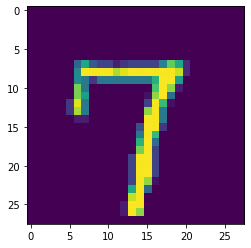

In [3]:
#visualising our dataset using matplotlib
image0 = df.iloc[6,1:]
image0                                                
plt.imshow(np.array(image0).reshape(28,28))

In [4]:
x = df.iloc[:,1:]
y = df.iloc[:,0]
from sklearn.model_selection import train_test_split
xtrain , xtest ,ytrain, ytest = train_test_split(x,y,test_size =0.2,shuffle = False,random_state =7)

In [5]:
from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier()
dtree.fit(xtrain , ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [6]:
ypred = dtree.predict(xtest)
ypred

array([0, 7, 7, ..., 7, 6, 9], dtype=int64)

In [7]:
from sklearn.metrics import confusion_matrix
cmdtree = confusion_matrix(ytest,ypred)
cmdtree ,dtree.score(xtest , ytest)

(array([[763,   3,  14,  15,   3,  19,  18,   3,  10,   4],
        [  0, 903,  13,   4,   4,   7,   5,   6,   6,   2],
        [ 16,   8, 671,  17,  16,  12,   9,  14,  31,   7],
        [  3,  14,  37, 707,   5,  50,   6,  16,  26,  18],
        [  6,  10,   7,  14, 685,  11,  14,  10,  14,  40],
        [  9,   3,  11,  43,  13, 595,  20,   5,  31,  17],
        [  6,   7,   9,   5,  20,  26, 741,   2,  10,   5],
        [  3,   6,  22,   8,   4,   8,   1, 801,  10,  21],
        [ 11,  13,  20,  28,  23,  29,  14,  10, 638,  16],
        [  6,   5,  14,  16,  34,  19,   7,  28,  22, 689]], dtype=int64),
 0.8563095238095239)

In [8]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rforest.fit(xtrain , ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
ypred = rforest.predict(xtest)
ypred

array([0, 7, 7, ..., 7, 6, 9], dtype=int64)

0.9434523809523809

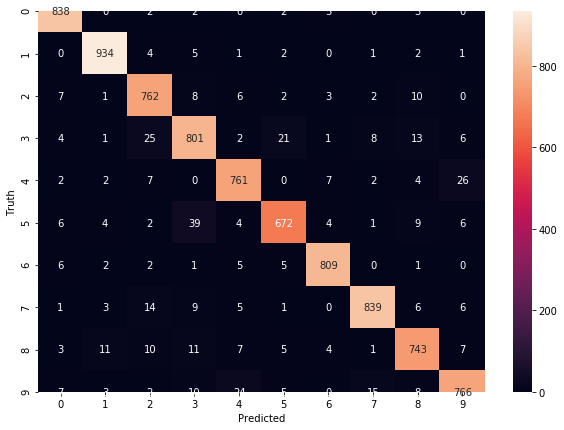

In [10]:
cmrforest = confusion_matrix(ytest , ypred)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cmrforest ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
rforest.score(xtest,ytest)